## Deep Learning Mammograms 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import math
import cv2

In [2]:
directory_path = 'D:\Dataset\MINI-DDSM-Complete-JPEG-8'
number_of_images = 0
for entry in os.scandir(directory_path):
    if entry.is_file():
        if entry.name.endswith(('.jpg', 'png', 'jpeg', 'pgm', 'dcm')):
            number_of_images += 1

print(f"Number of images in directory {directory_path} : {number_of_images}")

Number of images in directory D:\Dataset\MINI-DDSM-Complete-JPEG-8 : 1


## Mini CBIS MINI-DDSM-Complete Dataset 

Link to [dataset](https://www.kaggle.com/datasets/cheddad/miniddsm2?select=MINI-DDSM-Complete-JPEG-8)

### Data Processing

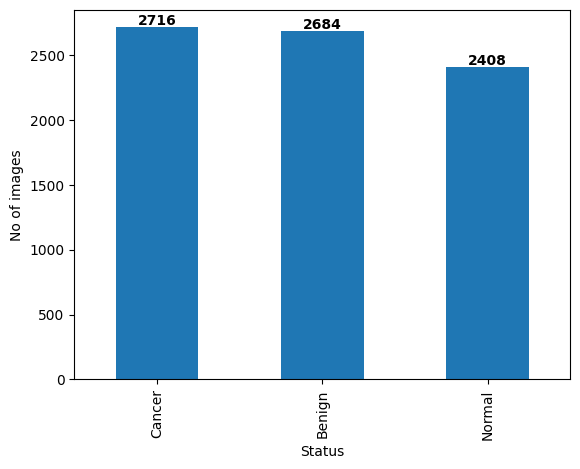

In [3]:
# check data_info on csv file
db = pd.read_excel('D:\Dataset\MINI-DDSM-Complete-JPEG-8\DataWMask.xlsx')

# plot bar chart of status 
ax = db['Status'].value_counts().plot(kind='bar', ylabel='No of images' )

for i,v in enumerate(db['Status'].value_counts()):
    ax.text(i, v, str(v), color='black', fontweight='bold', va='bottom', ha='center')


In [4]:
# Data PreProcessing
# benign dataset 
db_benign_images = 'D:\Dataset\MINI-DDSM-Complete-JPEG-8\Benign'

db_benign_images_file_path = []

for root, dirs, files in os.walk(db_benign_images):
    for file in files:
        if (file.endswith('.jpg') or file.endswith('.JPG')) and not (file.endswith('_Mask.jpg') or file.endswith('_MASK2.jpg')):
            db_benign_images_file_path.append(os.path.join(root, file))



In [5]:
# Data PreProcessing
# benign dataset 
db_cancer_images = 'D:\Dataset\MINI-DDSM-Complete-JPEG-8\Cancer'

db_cancer_images_file_path = []

for root, dirs, files in os.walk(db_cancer_images):
    for file in files:
        if (file.endswith('.jpg') or file.endswith('.JPG')) and not (file.endswith('_Mask.jpg') or file.endswith('_MASK2.jpg')):
            db_cancer_images_file_path.append(os.path.join(root, file))



In [6]:
# Data PreProcessing
# benign dataset 
db_normal_images = r'D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal'

db_normal_images_file_path = []

for root, dirs, files in os.walk(db_normal_images):
    for file in files:
        if (file.endswith('.jpg') or file.endswith('.JPG')) and not (file.endswith('_Mask.jpg') or file.endswith('_MASK2.jpg')):
            db_normal_images_file_path.append(os.path.join(root, file))



In [7]:
# print first 5 images in db_normal_images_file_path
for i in range(5):
    print(db_normal_images_file_path[i])

D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.LEFT_CC.jpg
D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.LEFT_MLO.jpg
D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.RIGHT_CC.jpg
D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0002\A_0002_1.RIGHT_MLO.jpg
D:\Dataset\MINI-DDSM-Complete-JPEG-8\Normal\0003\A_0003_1.LEFT_CC.jpg


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7808 entries, 0 to 7807
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fullPath         7808 non-null   object 
 1   fileName         7808 non-null   object 
 2   View             7808 non-null   object 
 3   Side             7808 non-null   object 
 4   Status           7808 non-null   object 
 5   Tumour_Contour   7808 non-null   object 
 6   Tumour_Contour2  7808 non-null   object 
 7   Age              7796 non-null   float64
 8   Density          7808 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 549.1+ KB


In [9]:
# check number of benign, cancer and normal images in dataset
status_counts = db['Status'].value_counts()
print(status_counts)

Status
Cancer    2716
Benign    2684
Normal    2408
Name: count, dtype: int64


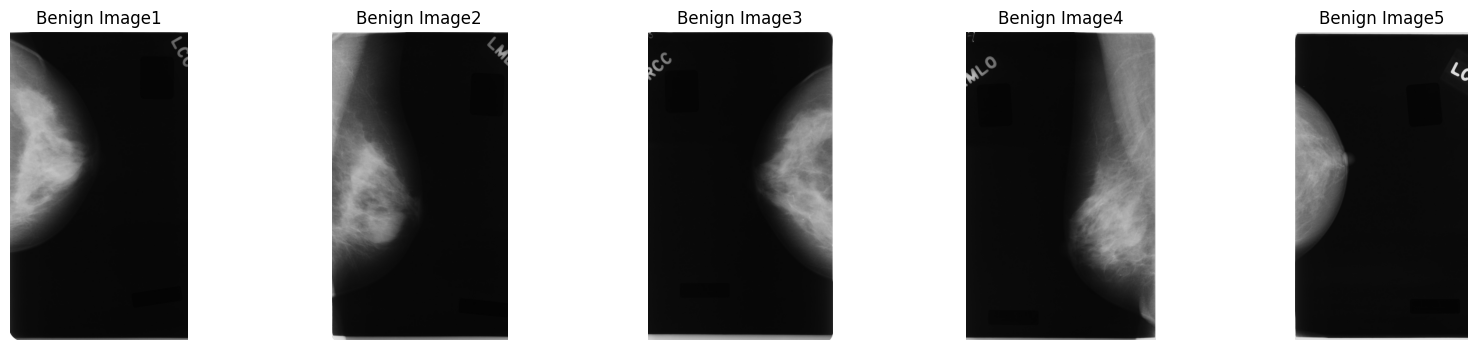

In [10]:
# display first five images in benign dataset 
fig, axes = plt.subplots(1, 5, figsize = (20,4))

for i, db_benign_image_file_path in enumerate(db_benign_images_file_path[:5]):
    image = cv2.imread(db_benign_images_file_path[i])
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    axes[i].imshow(image_rgb)
    axes[i].set_title(f'Benign Image{i+1}')
    axes[i].axis('off')

plt.show()

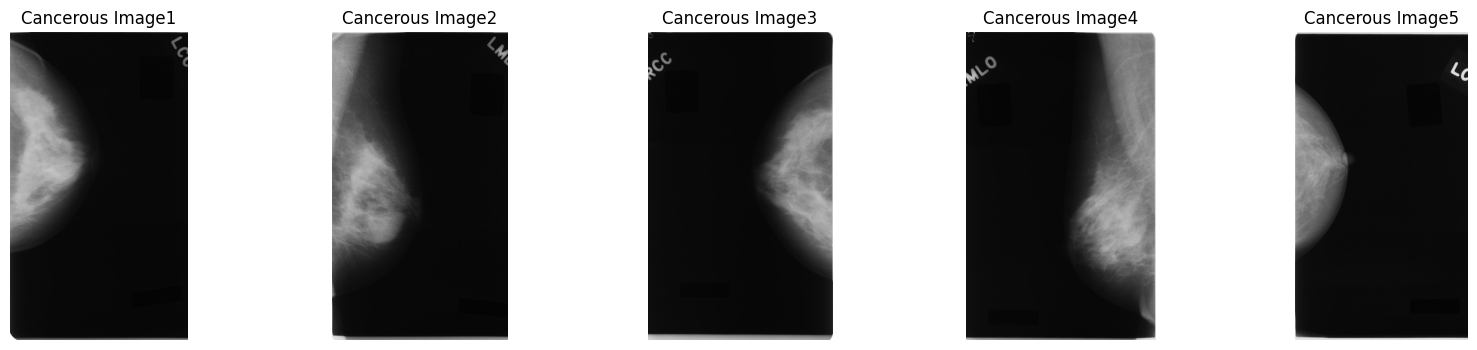

In [11]:
# display first five images in cancer dataset 
fig, axes = plt.subplots(1, 5, figsize = (20,4))

for i, db_cancer_image_file_path in enumerate(db_cancer_images_file_path[:5]):
    image = cv2.imread(db_benign_images_file_path[i])
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    axes[i].imshow(image_rgb)
    axes[i].set_title(f'Cancerous Image{i+1}')
    axes[i].axis('off')

plt.show()

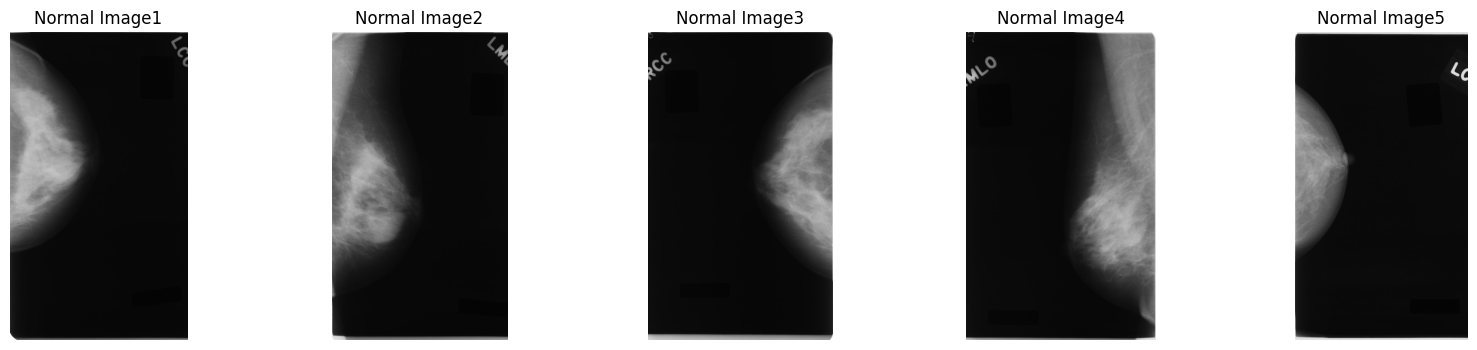

In [12]:
# display first five images in normal dataset 
fig, axes = plt.subplots(1, 5, figsize = (20,4))

for i, db_normal_image_file_path in enumerate(db_normal_images_file_path[:5]):
    image = cv2.imread(db_benign_images_file_path[i])
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    axes[i].imshow(image_rgb)
    axes[i].set_title(f'Normal Image{i+1}')
    axes[i].axis('off')

plt.show()

In [13]:
# function to resize images

def resize_images(image_path, new_height, new_width):
    resized_images = []
    for path in image_path:
        image = cv2.imread(path)
        resized_image = cv2.resize(image, (new_height, new_width))
        resized_images.append(resized_image)

    return resized_images



In [14]:
# resize benign images 
new_height = 200
new_width = 200
resized_benign_images = resize_images(db_benign_images_file_path, new_height, new_width)

In [15]:
# resize cancer images 
new_height = 200
new_width = 200
resized_cancer_images = resize_images(db_cancer_images_file_path, new_height, new_width)

In [16]:
# resize normal images 
new_height = 200
new_width = 200
resized_normal_images = resize_images(db_normal_images_file_path, new_height, new_width)

In [17]:
# Display images

def display_images(images, title):
    plt.figure(figsize=(10, 3))
    num_of_displayed_images = min(len(images), 5)

    for i in range(num_of_displayed_images):
        plt.subplot(1, num_of_displayed_images, i+1)
        plt.imshow(images[i])
        plt.title(f'Image{i+1}')
        plt.axis('off')

    plt.suptitle(title, fontsize=20)
    plt.show()

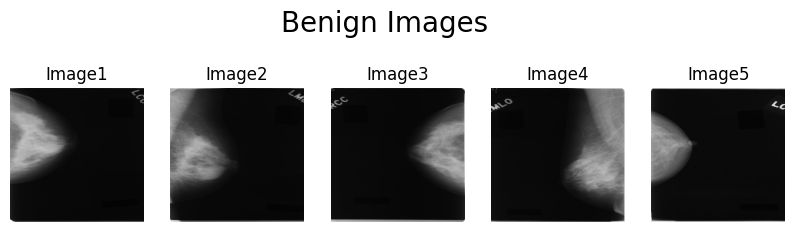

In [18]:
display_images(resized_benign_images, 'Benign Images')

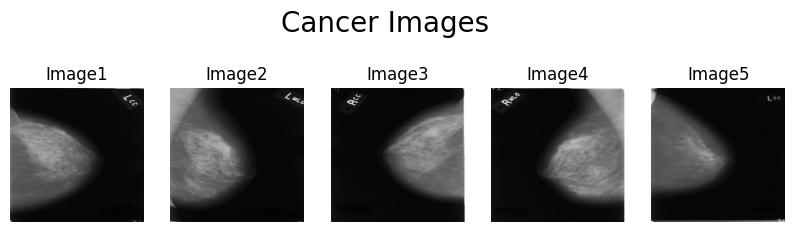

In [19]:
display_images(resized_cancer_images, 'Cancer Images')

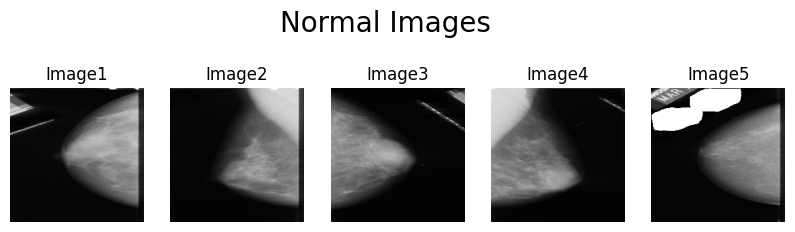

In [20]:
display_images(resized_normal_images, 'Normal Images')

In [21]:
db.isna().sum()

fullPath            0
fileName            0
View                0
Side                0
Status              0
Tumour_Contour      0
Tumour_Contour2     0
Age                12
Density             0
dtype: int64

In [22]:
# normalize pixel values to [0,1 ] range 
def normalize_images(images):
    normalized_images = []
    for image in images:
        normalized_image = image.astype(np.float32) / 255.0
        normalized_images.append(normalized_image)
    return normalized_images

In [23]:

normalized_benign_images = normalize_images(resized_benign_images)



In [24]:
normalized_cancer_images = normalize_images(resized_cancer_images)

In [25]:
normalized_normal_images = normalize_images(resized_normal_images)

In [26]:
def display_images(images, title):
    plt.figure(figsize=(10, 3))
    num_of_displayed_images = min(len(images), 5)

    for i in range(num_of_displayed_images):
        plt.subplot(1, num_of_displayed_images, i+1)
        plt.imshow(images[i])
        plt.title(f'Image{i+1}')
        plt.axis('off')

    plt.suptitle(title, fontsize=20)
    plt.show()

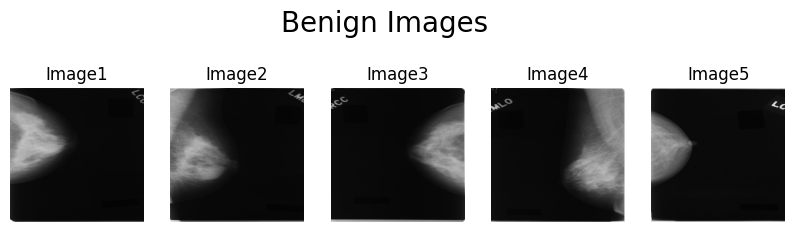

In [27]:
display_images(normalized_benign_images, 'Benign Images')

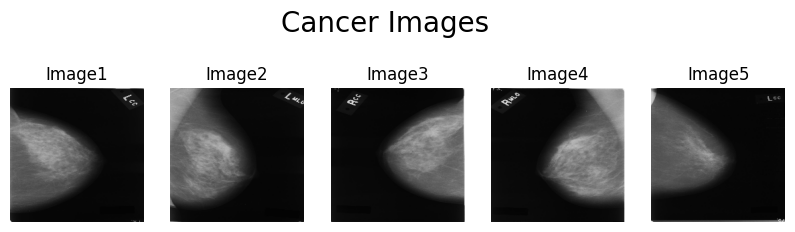

In [28]:
display_images(normalized_cancer_images, 'Cancer Images')

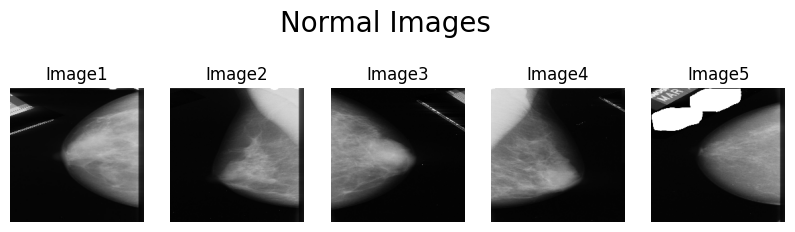

In [29]:
display_images(normalized_normal_images, 'Normal Images')

### Data Modeling and CNN

In [ ]:
fixed_size = (50,50)

X = [] # list for image data
y = [] # list for labels
